In [35]:
#install libs
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

This is the data gathered from https://files.slack.com/files-pri/TMZ70HBD4-F092MV06N9X/img_3647.jpg 
Pretty sure that link ain't stable.

The weights have been averaged and the outliers were removed

All samples were told to extrude 300mm of filament @240C with spring tension length of 13.5. 
Based of off the technical specs of the filament, this sample should weigh 88.1 0.01g

In [36]:
e_dot = np.array([20, 30, 40, 50, 60, 70, 80, 110, 140, 170, 200, 230]) # in mm/min @ 1.75mm/s 
weight_avg = np.array([71, 72, 70, 71, 72, 67, 65, 55, 41, 32, 28, 23]) # in 0.01g
weight_ideal = 88.1 # in 0.01g

In [37]:
weight_normalized = weight_avg / weight_ideal # normalized weight with the ideal being 1 (its not technicallyyy normalized because overextrusion exists but shhh)
print(weight_normalized)
weight_comphensated = 1 / weight_normalized # weight comphensation ratio 
print(weight_comphensated)

[0.80590238 0.81725312 0.79455165 0.80590238 0.81725312 0.76049943
 0.73779796 0.62429058 0.46538025 0.36322361 0.31782066 0.26106697]
[1.24084507 1.22361111 1.25857143 1.24084507 1.22361111 1.31492537
 1.35538462 1.60181818 2.14878049 2.753125   3.14642857 3.83043478]


Now we use the comphensated weight factors to fit a curve. Thus lets us sample any edot we want. A modified logistic curve was chosen because ummm idk lol

In [38]:
def curve_func(x, a, b, c, d, e):
    return a / (b + c**(d*x)) + e
params, covariance = curve_fit(curve_func, e_dot, weight_comphensated)
print(params)

[0.03784501 0.01150467 0.98500015 1.69332707 1.12152619]


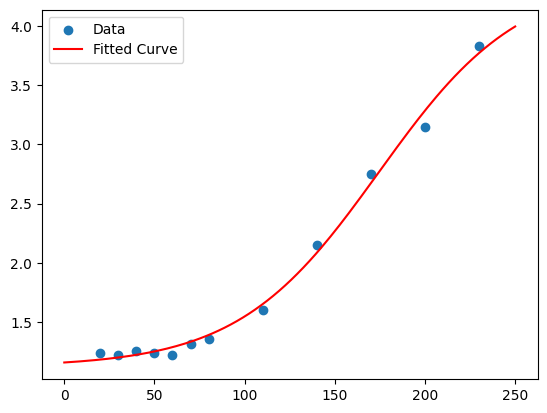

In [39]:
x_fit = np.linspace(0, max(e_dot) + 20, 150)
y_fit = curve_func(x_fit, *params)

plt.scatter(e_dot, weight_comphensated, label='Data')
plt.plot(x_fit, y_fit, color='red', label='Fitted Curve')
plt.legend()
plt.show()